[toc]

# hw4-task1

- P167，4.9 习题，1,2,3,4,5

In [1]:
dec = 6 # 设置每一步计算保留小数点后位数（精度，可以自己调整）
import numpy as np
np.set_printoptions(formatter={'float': ('{: 0.' + str(dec) + 'f}').format})
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
import sympy as sp

## 习题4.1

四个点插值3次方，是没有误差的，因此插值结果就是原函数：

$$
f(x) = 56x^3 + 24x^2 + 5
$$

## 习题4.2

In [2]:
# 简单定义一个 lagrange 插值类型
class LagInterpolation:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.N = len(x)
        mat = np.zeros([self.N, self.N])
        for i in range(self.N):
            mat[i] = self.x**i
            pass
        mat = mat.T
        self.coeff = np.linalg.solve(mat, self.y)
        pass
    
    def value(self, x):
        X = np.array([x**i for i in range(self.N)])
        return self.coeff @ X
        pass
    
    def value_array(self, x):
        y = np.zeros(len(x))
        for i in range(len(x)):
            y[i] = self.value(x[i])
            pass
        return y
        pass
    
    pass

In [3]:
x0 = np.array([
    1.1275, 1.1503, 1.1735, 1.1972
])
y0 = np.array([
    0.1191, 0.13954, 0.15932, 0.17903
])
ip = LagInterpolation(x0, y0)
print("多项式系数：", ip.coeff)

多项式系数： [-13.221562  32.002945 -26.106933  7.287827]


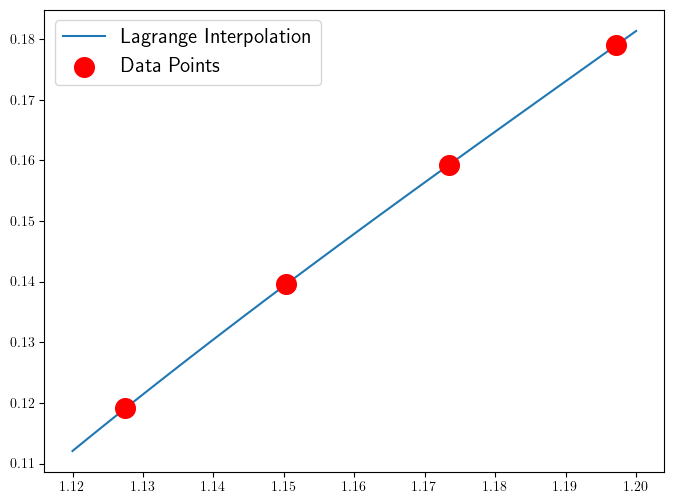

In [4]:
xx = np.linspace(1.12, 1.2, 100)
yy = ip.value_array(xx)
plt.figure(figsize=(8, 6))
plt.plot(xx, yy, label="Lagrange Interpolation")
plt.scatter(x0, y0, label="Data Points", color="red", s=200, zorder=100)
plt.legend(fontsize=15)
plt.show()

In [5]:
print("value at x=1.1300:")
print(ip.value(1.1300))

value at x=1.1300:
0.12140575555034161


## 习题4.3

### 第一问

记 $f(x)=x^j, j\leq n$，于是根据据定义有显然其 $n$ 阶拉格朗日插值函数为其本身，因此满足：

$$
\sum_{k=0}^n x_k^j l_k(x) = x^j\quad 0\leq j\leq n
$$

### 第二问

记函数：

$$
f(x)=(x-t)^j
$$

同前所述，$f(x)$ 可以用插值函数表示（被一组基函数的线性组合所表达）：

$$
f(x)=(x-t)^j=\sum_{k=0}^n (x_k-t)^j l_k(x)
$$

计算 $f(t)=0$ 则：

$$
0=\sum_{k=0}^n (x_k-t)^j l_k(t)
$$

得证。

## 习题4.4

### 第一问

记：$f(x)=x^5$，其可以被6个点的`Lagrange`插值精确得到：

$$
x^5=\sum_{j=0}^5 x_j^5 l_j(x)
$$

因此：

$$
0=\sum_{j=0}^5 x_j^5 l_j(0)
$$

### 第二问

同4.3，为0。

### 第三问

如第一问所述，对于 $j\in\{0,1,2,3,4,5\}$ 有：

$$
x^j=\sum_{i=0}^5 x_i^j l_i(x)
$$


因此：

$$
\text{原式}=x^5+2x^4+x^3+1
$$

让我们来测试一下，先创建 $6$ 个点

In [6]:
n = 5
x = sp.symbols('x')
xk = sp.symbols('x_0:'+str(n+1))
X = sp.Matrix(xk)
X

Matrix([
[x_0],
[x_1],
[x_2],
[x_3],
[x_4],
[x_5]])

再得到 6 个插值基函数

In [7]:
def getLagrangeFunction(j, n):
    L = 1
    for i in range(n+1):
        if i != j:
            L *= (x - xk[i]) / (xk[j] - xk[i])
            pass
        pass
    return L
    pass
lX = sp.zeros(X.shape[0], X.shape[1])
for i in range(n+1):
    lX[i] = getLagrangeFunction(i, n)
    pass
lX

Matrix([
[     (x - x_1)*(x - x_2)*(x - x_3)*(x - x_4)*(x - x_5)/((x_0 - x_1)*(x_0 - x_2)*(x_0 - x_3)*(x_0 - x_4)*(x_0 - x_5))],
[    (x - x_0)*(x - x_2)*(x - x_3)*(x - x_4)*(x - x_5)/((-x_0 + x_1)*(x_1 - x_2)*(x_1 - x_3)*(x_1 - x_4)*(x_1 - x_5))],
[   (x - x_0)*(x - x_1)*(x - x_3)*(x - x_4)*(x - x_5)/((-x_0 + x_2)*(-x_1 + x_2)*(x_2 - x_3)*(x_2 - x_4)*(x_2 - x_5))],
[  (x - x_0)*(x - x_1)*(x - x_2)*(x - x_4)*(x - x_5)/((-x_0 + x_3)*(-x_1 + x_3)*(-x_2 + x_3)*(x_3 - x_4)*(x_3 - x_5))],
[ (x - x_0)*(x - x_1)*(x - x_2)*(x - x_3)*(x - x_5)/((-x_0 + x_4)*(-x_1 + x_4)*(-x_2 + x_4)*(-x_3 + x_4)*(x_4 - x_5))],
[(x - x_0)*(x - x_1)*(x - x_2)*(x - x_3)*(x - x_4)/((-x_0 + x_5)*(-x_1 + x_5)*(-x_2 + x_5)*(-x_3 + x_5)*(-x_4 + x_5))]])

测试 $x^5+2x^4+x^3+1$（没问题）：

In [8]:
s = 0
for i in range(n+1):
    s += X[i]**5 * lX[i]
    s += 2*X[i]**4 * lX[i]
    s += X[i]**3 * lX[i]
    s += lX[i]
    pass
sp.simplify(s)

x**5 + 2*x**4 + x**3 + 1

## 习题4.5

$$
\ln \omega(x)=\sum_{i=0}^n \ln(x-x_i)
$$

两侧对 $x$ 求导：

$$
\frac{\omega^\prime (x)}{\omega(x)}=\sum_{i=0}^n\frac{1}{x-x_i}
$$

因此：

$$
\omega^\prime(x)=\sum_{i=0}^n \prod_{j\neq i}^n (x-x_j)
$$

因此：


$$
\omega^\prime(x_k)=\sum_{i=0}^n \prod_{j\neq i}^n (x_k-x_j)
$$

当 $k\neq i$ 时，会发现 $\prod_{j\neq i}^n (x_k-x_j)=0$ ，因此上式化简为：

$$
\omega^\prime(x_k)=\prod_{j\neq k}^n (x_k-x_j)
$$